## 1. Let's first define the main derivative operation: 

In [1]:
function nabla(f, x::Float64, delta::Float64)

  ## automatic differentiation of holomorphic functions in a single complex variable
  ## applied to real-valued functions in a single variable using the Cauchy Integral Formula

  N = round(Int,2*pi/delta)
  thetas = vcat(1:N)*delta

  ## collect arguments and rotations: 
  rotations = map(theta -> exp(-im*theta),thetas)
  arguments = x .+ conj.(rotations)  

  ## calculate expectation: 
  expectation = 1.0/N*real(sum(map(f,arguments).*rotations))

  return expectation

end

nabla (generic function with 1 method)

## 2. We define a function to compute the error of nabla: 

In [2]:
## define average rate of convergence for different deltas and inputs x: 
function average_errors(f,df,X::Array{Float64,1})

    errors = zeros(5)

    for i = 1:5

        delta = (2*pi)/10^i

        nabla_hat = map(x -> nabla(f,x,delta),X)

        nabla_true =  df.(X)
        
        errors[i] = sum((nabla_hat .-nabla_true).^2)/100
    
    end
    
    return errors

end

average_errors (generic function with 1 method)

## 3. Let's consider a few neural network activation functions: 

In [3]:
sig(x) = 1/(1+exp(-x))

d_sig(x) = sig(x)*(1-sig(x))

sinh(x) = (exp(x)-exp(-x))/2

cosh(x) = (exp(x)+exp(-x))/2

tanh(x) = sinh(x)/cosh(x)

d_tanh(x) = 1/cosh(x)^2

## this is an analytic approximation to the relu: 
relu(x) = log(1+exp(x))

d_relu(x) = sig(x)

d_relu (generic function with 1 method)

## 4. The case of the sigmoid: 

In [4]:
## define range ~(-10,10): 
X = (vcat(1:100).-50.5)*.01

errors = average_errors(sig,d_sig,X)

5-element Array{Float64,1}:
 1.9003506373273576e-12
 5.0844550531823024e-33
 3.06145823959795e-32  
 7.51112678311022e-33  
 3.42815530100928e-33  

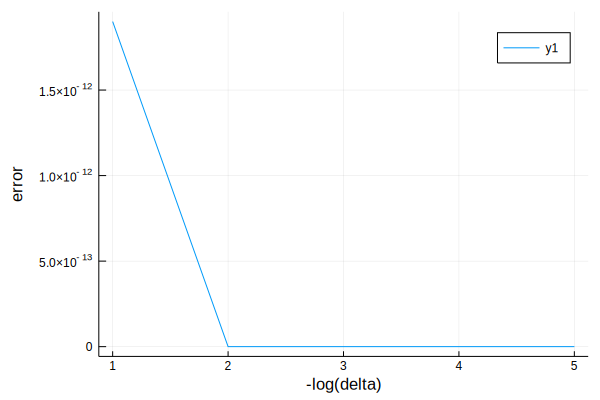

In [5]:
using Plots

## plotting position against time: 
plot(1:5,errors)

xlabel!("-log(delta)")
ylabel!("error")

## 

## 5. The case of the tanh: 

In [6]:
## define range ~(-10,10): 
X = (vcat(1:100).-50.5)*.01

errors = average_errors(tanh,d_tanh,X)

5-element Array{Float64,1}:
 2.91501197256117e-5   
 8.911663038668618e-32 
 5.253320590706175e-31 
 5.842501079293119e-32 
 3.3649847988333785e-32

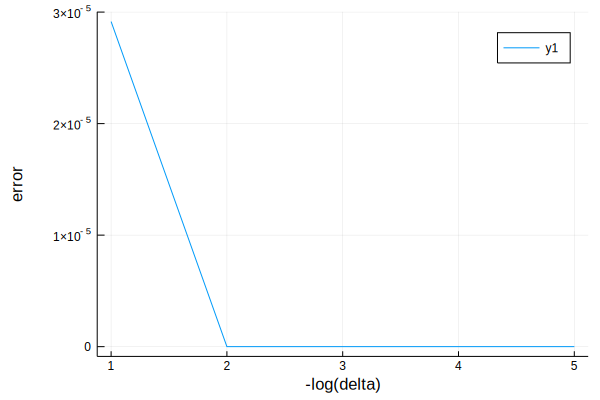

In [7]:
using Plots

## plotting position against time: 
plot(1:5,errors)

xlabel!("-log(delta)")
ylabel!("error")

## 6. The case of relu: 

In [8]:
## define range ~(-10,10): 
X = (vcat(1:100).-50.5)*.01

errors = average_errors(relu,d_relu,X)

5-element Array{Float64,1}:
 1.822868958433552e-13 
 2.582286869434406e-32 
 1.815612677172735e-31 
 2.348093788196918e-32 
 1.0631133293017542e-32

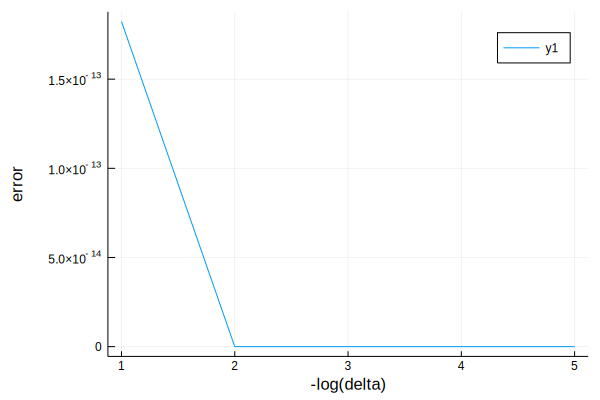

In [9]:
using Plots

## plotting position against time: 
plot(1:5,errors)

xlabel!("-log(delta)")
ylabel!("error")